In [0]:
# Project --> Self Driving Car

In [1]:
# For Data first we generate the data by Udacity AI Self Driving Car Simulator then upload it to bitbucket account then clone 
# it here with the below command.  
# We don't use GitHub because it don't give space more than 100 MB

!git clone https://njnitesh@bitbucket.org/njnitesh/self_driving_car_data.git

Cloning into 'self_driving_car_data'...
remote: Counting objects: 23195, done.
remote: Compressing objects: 100% (23195/23195), done.
remote: Total 23195 (delta 1), reused 23194 (delta 0)
Receiving objects: 100% (23195/23195), 318.03 MiB | 9.06 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (23192/23192), done.


In [2]:
# Let's see what is inside this repo data
!ls self_driving_car_data

driving_log1.csv  driving_log.csv  IMG	IMG1


In [0]:
# As this above cloned repo will have 4 files 2 of .csv format which contains images locations with there name & other 2 contains
# images .

In [4]:
# Importing the necessary Libraries

import os 
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

import keras
from keras.models import Sequential   # Sequential is a Model 
from keras.optimizers import Adam     # Adam is an Optimizer for finding the optimized weight of the neurons
from keras.layers import Convolution2D , Dense , MaxPooling2D, Dropout, Flatten

import cv2 as cv

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa   # If we don't have much data then Augmenters is user to generate the data of the 
                                       # similar type data which we already have.
import pandas as pd
import random
import ntpath

Using TensorFlow backend.


In [0]:
# Taking driving_log.csv & then build a dataframe as dt1 of 'center' & 'steering' columns only
# Similarly take driving_log1.csv & then build a dataframe as dt2 of 'center' & 'steering' columns only

# A complete directory for the Self_Driving_Car Data
datadir = 'self_driving_car_data'
# Adding some columns in the self_driving_car_data datadir
column = ['center' , 'left' , 'right' , 'steering' , 'throttle' , 'reverse' , 'speed']

# Reading the first file driving_log.csv & join with daradir with the columns
data = pd.read_csv(os.path.join(datadir , 'driving_log.csv') , names = column)

# Reading the second file driving_log1.csv & join with daradir with the columns
data1 = pd.read_csv(os.path.join(datadir , 'driving_log1.csv') , names = column)


In [6]:
# Print the top 2 rows of the first file 
data.head(2)

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Tushar\Downloads\self\IMG\center_2019...,C:\Users\Tushar\Downloads\self\IMG\left_2019_...,C:\Users\Tushar\Downloads\self\IMG\right_2019...,0.0,0.0,0,0.000078
1,C:\Users\Tushar\Downloads\self\IMG\center_2019...,C:\Users\Tushar\Downloads\self\IMG\left_2019_...,C:\Users\Tushar\Downloads\self\IMG\right_2019...,0.0,0.0,0,0.000078


In [7]:
# Print the top 2 rows of the second file 
data1.head(2)

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Tushar\Downloads\self1\IMG\center_201...,C:\Users\Tushar\Downloads\self1\IMG\left_2019...,C:\Users\Tushar\Downloads\self1\IMG\right_201...,0.0,0.0,0,3.556126
1,C:\Users\Tushar\Downloads\self1\IMG\center_201...,C:\Users\Tushar\Downloads\self1\IMG\left_2019...,C:\Users\Tushar\Downloads\self1\IMG\right_201...,0.0,0.0,0,3.570937


In [0]:
# As we want the images name from the 'center' column because we only trainned our car model for the driving on the 
# center of the road.

In [9]:
# .iloc select data by row number 
# .loc select data by label

# Test for one image
data.iloc[0].center.split("\\")[-1]

# As it gives the image name from the center column 

'center_2019_06_12_17_54_36_075.jpg'

In [0]:
# Now we use lambda fxn & apply it to all so that we can split all the images names & put them again into data.center label  
# for both the files.

# For driving_log.csv file 
data.center = data.center.apply(lambda x: x.split("\\")[-1])
# For driving_log1.csv file
data1.center = data1.center.apply(lambda x: x.split("\\")[-1])

In [0]:
# Now we create the Dataframes of center & steering from both the files

# For driving_log.csv file
dt1 = data.loc[:,["center","steering"]]
# For driving_log1.csv file
dt2 = data1.loc[:,["center","steering"]]

In [12]:
# Now we visulaize the data of the dt1 DataFrame

num_bins = 25 # these are no. of intervals
hist,bins = np.histogram(dt1['steering'] , num_bins)   # hist => no. of frequencies of each bin & bins => no. of intervals

print("There are ",len(hist) ," elements present in the hist")
print(hist)

print("There are ",len(bins) ," elements present in the bins")
print(bins)

There are  25  elements present in the hist
[  18    5   13   28   66   34   79  174  253   69  109  189 4999   39
   25    9   70   56   20    8   27   17    4    1   12]
There are  26  elements present in the bins
[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


In [13]:
# As we can see above that we have 5 elements in the 'hist' & 26 elements in the 'bins' so visulaization is not possbile 
# because bar plot is only plotted for equal no. of elements in each list 

# For this we use below concept in which we first take all elements of bins except last one then we take the all the elements
# of bins again except the first one , then adding both the arrays & divide by 2
# so by this method we can get the 25 elements in the bins 
(bins[:-1]+bins[1:])/2

# Checking the length of the bins
len((bins[:-1]+bins[1:])/2)

25

In [14]:
print(hist)
print(bins)
center  = (bins[:-1] + bins[1:])*0.5  # for adjusting the values to 25 only
print("\nAfter applying the above concept to the bins we will get new bins as ")
print(center)

[  18    5   13   28   66   34   79  174  253   69  109  189 4999   39
   25    9   70   56   20    8   27   17    4    1   12]
[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]

After applying the above concept to the bins we will get new bins as 
[-0.96 -0.88 -0.8  -0.72 -0.64 -0.56 -0.48 -0.4  -0.32 -0.24 -0.16 -0.08
  0.    0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72  0.8   0.88
  0.96]


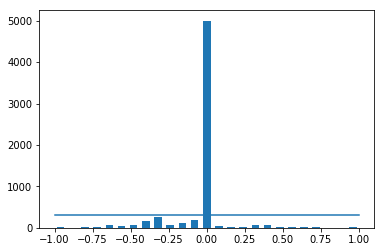

In [15]:
samples_per_bin = 300
# Plot Histogram
plt.bar(center , hist, width = 0.05)
# Plot Line 
plt.plot((np.min(dt1['steering']) , np.max(dt1['steering'])) , (samples_per_bin , samples_per_bin))  #(-1,1),(300,300)

In [0]:
# Now we want to drop the images which are above the line for good trainning our Model
# So we have 2 methods defined below

# Note --> I we apply method 1 then we don't apply method 2 because when we apply both the methods then we got an error
# called KetError : 380  
# It occurs due because we already drop the 380 indexed image in one of the method so it is don't present again for another 
# method

In [0]:
# Method 1 for dropping the images b/w -0.04 & 0.04 above 300 images

# This method will only drop the images of the steering label only 

# No. of images which will have steering angle b/w -0.04 & 0.04 
print( len((dt1['steering'] >= -0.04)  &  (dt1['steering'] <= 0.04)) )

# Images which are having steering angle b/w -0.04 & 0.04
p = dt1[(dt1['steering'] >= -0.04)  &  (dt1['steering'] <= 0.04)]
p.count
p.index[300:] # Slecting the images above 300 i.e above the line

# Drop the images from the 'dt1' DataFrame above 300 i.e the line 
dt1.drop(p.index[300:] , inplace =True)


6324


In [0]:
# Left out Images which we have for training the car 
dt1.count()

center      1625
steering    1625
dtype: int64

[ 18   5  13  28  66  34  79 174 253  69 109 189 300  39  25   9  70  56
  20   8  27  17   4   1  12]


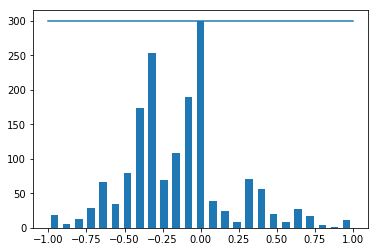

In [0]:
# Visualizing the data
hist , _ = np.histogram(dt1['steering'] , (num_bins))
plt.bar(center , hist , width = 0.05)
print(hist)
plt.plot((np.min(dt1['steering']) , np.max(dt1['steering'])) , (samples_per_bin , samples_per_bin))

total data: 6324
removed : 4699
remaining :  1625
[ 18   5  13  28  66  34  79 174 253  69 109 189 300  39  25   9  70  56
  20   8  27  17   4   1  12]


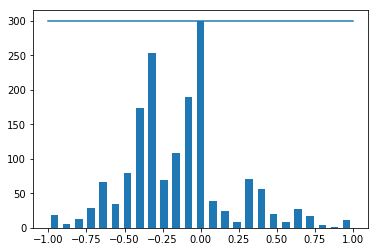

In [16]:
# Method 2 for dropping all the image which are above 300 i.e the line 

print('total data:' , len(dt1))

# A list which contains all the images for dropping from 'dt1' DataFrame
remove_list = []

# Now Process Begins
for j in range(num_bins):     # Loop For all the intervals of presented 
  list_ = []
  for i in range(len(dt1['steering'])):
    if (dt1['steering'][i] >= bins[j]) and (dt1['steering'][i] <= bins[j+1]):
      # as like -0.04 and +0.04
      list_.append(i)  # Appending the index of the image to the 'list_'
      
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin : ] # Contain the indexes which we want to remove
  remove_list.extend(list_)  # put the images indexes into the reomove_list which we want to remove
 
print('removed :' , len(remove_list))
dt1.drop(dt1.index[remove_list] , inplace=True)
print('remaining : ' , len(dt1))

# Calculating the histogram for new plot
hist , _ = np.histogram(dt1['steering'] , (num_bins))
plt.bar(center , hist , width = 0.05)
print(hist)
plt.plot((np.min(dt1['steering']) , np.max(dt1['steering'])) , (samples_per_bin , samples_per_bin))


    


In [0]:
# KeyError : 380 is occur because when we first drop the images form the dt1 then 380 index is removed from the dt1 so when we 
# run 2nd method then it don't able to find that index location so thats why it show KeyError : 380

In [18]:
# Now we Visulaize the 'dt2' DataFrame
num_bins2 = 25
hist2 , bins2 = np.histogram( dt2['steering'] , num_bins2 )

print("There are ", len(hist2) ," elements present in the hist2")
print(hist2)

print("There are ", len(bins2) ," elements present in the bins2")
print(bins2)

There are  25  elements present in the hist2
[ 41   8   8  15  25  25  29  43  62  28  42  48 846  26  11  18  49  17
  10  12  21   7   2   8   5]
There are  26  elements present in the bins2
[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


In [19]:
# So as we can see that bins2 will conatins 26 elements & hist2 conatins 25 elements so bar plot is not possible
# To make it possible we use the same concept as aboved used

(bins2[:-1] + bins2[1:])/2
len((bins2[:-1] + bins2[1:])/2)  # output is 25 

25

In [20]:
print(hist2)
print(bins2)
center2 = (bins2[:-1] + bins[1:])/2
print("\nAfter applying the above concept to the bins2 we will get new bins2 as center2 with values")
print(center2)

[ 41   8   8  15  25  25  29  43  62  28  42  48 846  26  11  18  49  17
  10  12  21   7   2   8   5]
[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]

After applying the above concept to the bins2 we will get new bins2 as center2 with values
[-0.96 -0.88 -0.8  -0.72 -0.64 -0.56 -0.48 -0.4  -0.32 -0.24 -0.16 -0.08
  0.    0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72  0.8   0.88
  0.96]


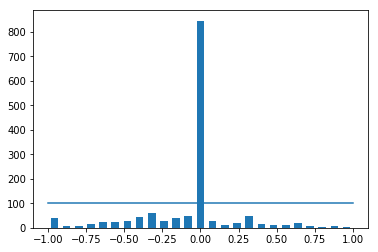

In [21]:
# Now we plot the bar plot
samples_per_bin2 = 100   # 300 is to much as compared to 100 for this DataFrame
plt.bar(center2 , hist2 , width = 0.05)
# Plot the line
plt.plot( (np.min(dt2['steering']) ,np.max(dt2['steering'])) , (samples_per_bin2 , samples_per_bin2) )

Total data:  1406
Removed :  746
Remaining :  660
[ 41   8   8  15  25  25  29  43  62  28  42  48 846  26  11  18  49  17
  10  12  21   7   2   8   5]


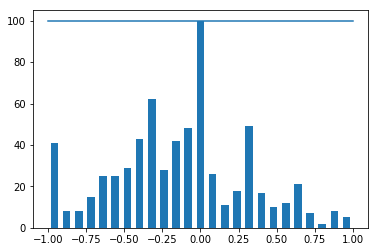

In [22]:
# Now for Dropout the Images we use the Method 2 because it will perform dropout for all the bins not a single bin

print("Total data: " ,len(dt2))

# A list for containing the indexes of the images which are we want to droupout
remove_list2 = []

# Process Begins
for i in range(num_bins2):
  list_2 = []
  for j in range(len(dt2['steering'])):
    if dt2['steering'][j] >= bins2[i] and dt2['steering'][j] <= bins2[i+1]:
      list_2.append(j)
      
  list_2 = shuffle(list_2)
  list_2 = list_2[samples_per_bin2: ] # i.e images index from sample_per_bin(100) to last are put into the list_2
  remove_list2.extend(list_2)
      
    
print("Removed : ", len(remove_list2))
dt2.drop(dt2.index[remove_list2] , inplace =True)
print("Remaining : ", len(dt2))


# Now Ploting the histogram of the dt2 DataFrame
hist , _ = np.histogram( dt2['steering'] , num_bins2)
plt.bar(center , hist , width = 0.05)
print(hist2)
# Plot the line
plt.plot( (np.min(dt2['steering']) , np.max(dt2['steering'])) , (samples_per_bin2 , samples_per_bin2) )

    
    
      
  


In [0]:
# Collecting the paths of all the images of 'dt1' dataframe
def load_img_steering(base_dir , dataframe):
  image_paths = []
  steering_angle = []
  
  # Taking dataframe values as numpy array
  center = dataframe.iloc[:,0].values
  print(len(center))
  angle = dataframe.iloc[:,1].values
  print(len(angle))
  
  # Iterating the loop over the whole loop
  for i in range(len(dataframe)):
    image_paths.append(os.path.join(base_dir , center[i]))
    steering_angle.append(angle[i])
    
    # Returning list as numpy array
  image_p = np.array(image_paths)
  angle_p = np.array(steering_angle)
  return image_p , angle_p
    

In [24]:
image_paths, steerings = load_img_steering("self_driving_car_data/IMG", dt1)

image_paths1, steerings1 = load_img_steering("self_driving_car_data/IMG1", dt2)

1625
1625
660
660


In [25]:
print(len(dt1))
print(len(dt2))

1625
660


In [26]:
print(len(image_paths))
print(len(image_paths1))

1625
660


In [27]:
x_train ,x_valid , y_train , y_valid = train_test_split(image_paths , steerings , test_size = 0.2 , random_state =21)
print('Training Samples: {}'.format(len(x_train) , len(x_valid)))

Training Samples: 1300


In [28]:
x_train1 ,x_valid1 , y_train1 , y_valid1 = train_test_split(image_paths1 , steerings1 , test_size = 0.2 , random_state =21)
print('Training Samples: {}'.format(len(x_train1) , len(x_valid1)))

Training Samples: 528


Text(0.5, 1.0, 'Zoomed Image')

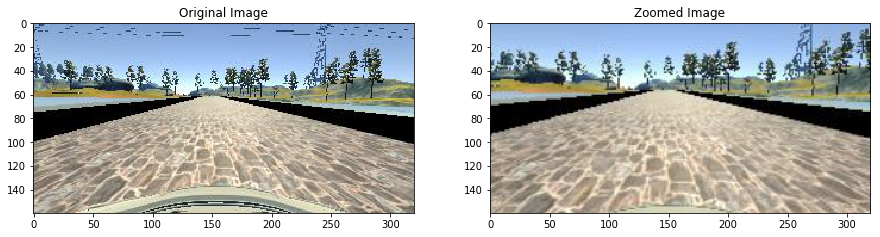

In [29]:
# Definition

# Fxn For Zoom the image
def zoom(image):
  zoom = iaa.Affine( scale = (1 , 1.3))
  image = zoom.augment_image(image)
  return image

# image selection
image = image_paths[random.randint(0 , 1000)]
original_image = mpimg.imread(image)

# Function Applied
zoomed_image = zoom(original_image)

#Ploting both the images in one canvas
fig , axs= plt.subplots(1 , 2 ,figsize = (15,10))
axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')


Text(0.5, 1.0, 'Panned Image')

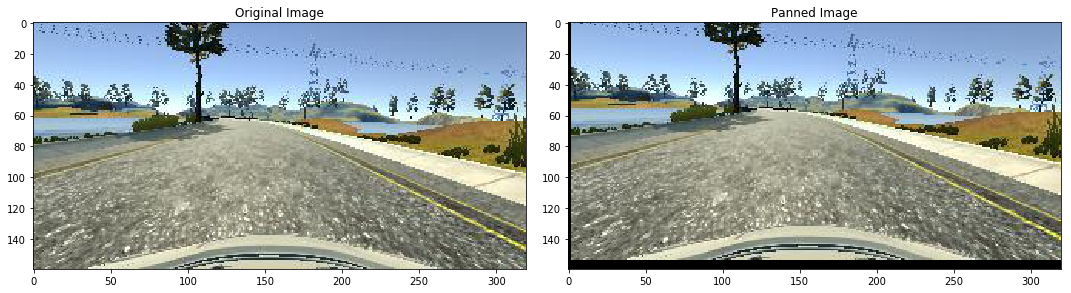

In [30]:
# Function for sliding image into x dir or y dir so that we have generate new images for our model 

# Definition
def pan(image):
  pan = iaa.Affine(translate_percent =  {"x" : (-0.1 , 0.1) , "y" : (-0.1 , 0.1)})
  image = pan.augment_image(image)
  return image

# Testing for 'dt1' dataframe
image = image_paths[random.randint(0 , 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig , axs = plt.subplots(1 , 2 ,figsize=( 15 , 10 ))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("Original Image")

axs[1].imshow(panned_image)
axs[1].set_title("Panned Image")


Text(0.5, 1.0, 'Brightness Altered Image')

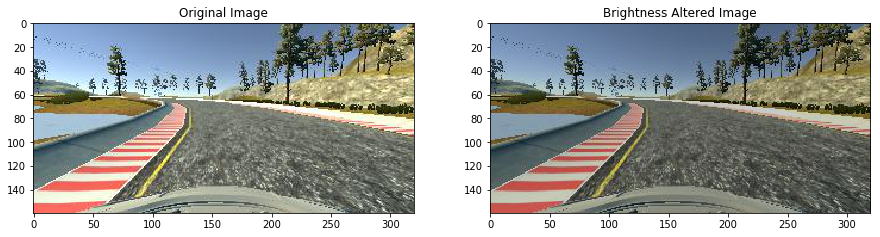

In [31]:
# Increasing the image brightness for new images
def img_random_brightness(image):
  brightness = iaa.Multiply((0.2 , 1.2))
  image = brightness.augment_image(image)
  return image


# Testing for 'dt1' dataframe
image = image_paths[random.randint(1 , 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)

fix , axs = plt.subplots(1 , 2 , figsize = (15 , 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness Altered Image')

Text(0.5, 1.0, 'Flipped Image  - Steering Angle:0.43269940000000007')

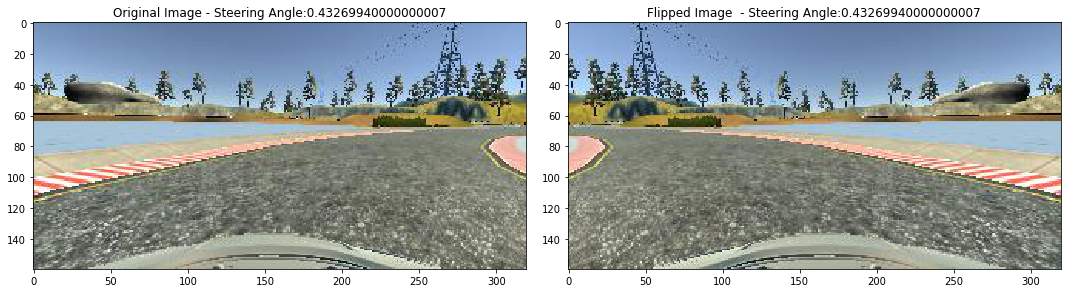

In [32]:
# Flipping images for generating new images
def img_random_flip(image , steering_angle):
  image = cv.flip(image , 1)
  steering_angle = -steering_angle
  return image , steering_angle


# Testing for 'dt1' dataframe
random_index = random.randint( 0 , 1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]

original_image = mpimg.imread(image)
flipped_image , flipped_steering_angle = img_random_flip( original_image , steering_angle)

fig , axs = plt.subplots( 1 , 2 ,figsize=( 15 , 10) )
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image  - ' + 'Steering Angle:' + str(steering_angle))


In [0]:
# Fxn for applying diff effects on the diff images
def random_augment(image , steering_angle):
  image = mpimg.imread(image)
  if np.random.rand() < 0.5 :
    image = pan(image)
  if np.random.rand() < 0.5 :
    image = zoom(image)
  if np.random.rand() < 0.5 :
    image = img_random_brightness(image)
  if np.random.rand() < 0.5 :
    image , steering_angle = img_random_flip( image , steering_angle )
    
  return image , steering_angle

In [34]:
ncol = 2
nrow = 10

fig , axs = plt.subplots(nrow , ncol , figsize = (15 ,50))
fig.tight_layout()

for i in range(10):
  randnum = random.randint( 0 , len(image_paths) -1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]
  
  original_image = mpimg.imread(random_image)
  augmented_image ,steering = random_augment(random_image , random_steering)
  
  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")
  
  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")


Output hidden; open in https://colab.research.google.com to view.

In [0]:
import cv2

Text(0.5, 1.0, 'Preprocessed Image')

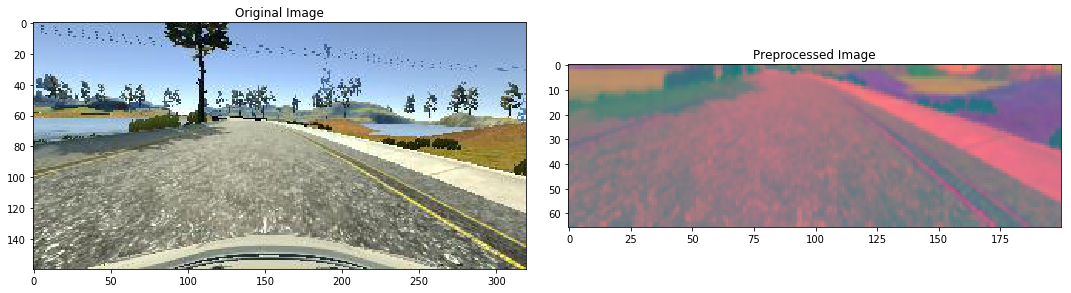

In [36]:
# Now we want to remove the bonnet of the car & some part of sky
def img_preprocess(img):
  img = img[60:135,:,:]
  img = cv2.cvtColor(img , cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img , (3,3) , 0)
  img = cv2.resize( img , (200 , 66))
  img = img/255
  return img


image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig , axs = plt.subplots( 1 , 2 , figsize = (15,10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("Original Image")

axs[1].imshow(preprocessed_image)
axs[1].set_title("Preprocessed Image")

In [0]:
# Now we define a function for generating batch
def batch_generator(image_paths , steering_ang , batch_size , istraining):   # istraining is a boolean variable
  
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) -1)
      
      if istraining:
        im , steering = random_augment(image_paths[random_index] , steering_ang[random_index])
        
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
        
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
      
    yield(np.asarray(batch_img) , np.asarray(batch_steering))
        
        

In [0]:
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24, 5, 5, subsample=(2, 2), input_shape=(66, 200, 3), activation='elu'))
  model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='elu'))
  model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='elu'))
  model.add(Convolution2D(64, 3, 3, activation='elu'))
  
  model.add(Convolution2D(64, 3, 3, activation='elu'))
  #model.add(Dropout(0.5))
  
  
  model.add(Flatten())
  
  model.add(Dense(100, activation = 'elu'))
  #model.add(Dropout(0.5))
  
  model.add(Dense(50, activation = 'elu'))
  #model.add(Dropout(0.5))
  
  model.add(Dense(10, activation = 'elu'))
  #model.add(Dropout(0.5))

  model.add(Dense(1))
  
  optimizer = Adam(lr=1e-4)
  model.compile(loss='mse', optimizer=optimizer,metrics=["accuracy"])
  return model

In [39]:
x_train.shape

(1300,)

In [40]:
model = nvidia_model()
print(model.summary())

W0617 12:08:40.004229 140370888513408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
W0617 12:08:40.047654 140370888513408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 12:08:40.056828 140370888513408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               115300    
__________

In [41]:
# Here we use fit_generator because we don't have images we have only image locations 
# when we fit these images paths into the model then 
history = model.fit_generator(batch_generator(x_train, y_train, 100, 1),
                                  steps_per_epoch=300, 
                                  epochs=5,
                                  validation_data=batch_generator(x_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

W0617 12:08:50.702412 140370888513408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0617 12:08:50.970311 140370888513408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/5
300/300 [==============================] - 160s 532ms/step - loss: 0.1175 - acc: 0.1779 - val_loss: 0.0824 - val_acc: 0.1811
Epoch 2/5
300/300 [==============================] - 155s 516ms/step - loss: 0.0943 - acc: 0.1782 - val_loss: 0.0788 - val_acc: 0.1855
Epoch 3/5
300/300 [==============================] - 155s 517ms/step - loss: 0.0839 - acc: 0.1740 - val_loss: 0.0661 - val_acc: 0.1955
Epoch 4/5
300/300 [==============================] - 156s 520ms/step - loss: 0.0763 - acc: 0.1785 - val_loss: 0.0622 - val_acc: 0.1940
Epoch 5/5
300/300 [==============================] - 155s 515ms/step - loss: 0.0714 - acc: 0.1816 - val_loss: 0.0575 - val_acc: 0.1921


Text(0.5, 0, 'epoch')

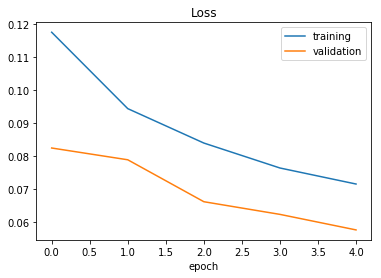

In [42]:
# Visulaize the grph b/w 'loss' & 'var_loss'
plt.plot(history.history['loss'])    # When we fit data & train the data above then it will return some history & that history will contains another history
plt.plot(history.history['val_loss'])
plt.legend(['training' , 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

In [0]:
model.save('model3.h5')

In [0]:
from google.colab import files
files.download('model3.h5')

In [0]:
conda install -c conda-forge tensorflow
python-socketio
eventlet,
flask,
opencv,
tensorflow,
pillow
